<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/CNN_Fashion_MNST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from tensorflow.keras.datasets import fashion_mnist

In [92]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [93]:
x_train.shape

(60000, 28, 28)

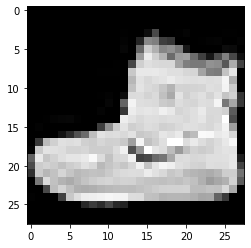

In [94]:
plt.imshow(x_train[0],cmap='gray');

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

In [97]:
x_train = x_train/255

In [98]:
x_test = x_test/255

In [99]:
# y_cat_train[0]
#y_cat_train.shape
x_train[0].min()
# 32*28*28

0.0

In [100]:
x_train = x_train.reshape(60000, 28, 28,1) # check this out
# x_test.shape

In [101]:
x_test = x_test.reshape(10000, 28, 28,1)

In [102]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [103]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(4,4),strides=(1,1), activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [107]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test,y_cat_test), callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5417 - accuracy: 0.8083 - val_loss: 0.3450 - val_accuracy: 0.8763
Epoch 2/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2882 - accuracy: 0.8959 - val_loss: 0.2917 - val_accuracy: 0.8975
Epoch 3/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2335 - accuracy: 0.9137 - val_loss: 0.2566 - val_accuracy: 0.9060
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2021 - accuracy: 0.9251 - val_loss: 0.2661 - val_accuracy: 0.9016


In [108]:
metrics = pd.DataFrame(model.history.history)

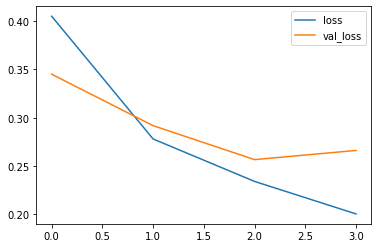

In [109]:
metrics[['loss','val_loss']].plot();

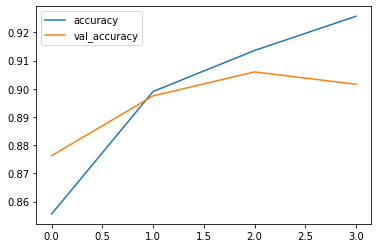

In [110]:
metrics[['accuracy','val_accuracy']].plot();

In [111]:
model.evaluate(x_test,y_cat_test,verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.2661 - accuracy: 0.9016


[0.26607540249824524, 0.9016000032424927]

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
prediction = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [118]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.83      0.85      1000
           3       0.87      0.93      0.90      1000
           4       0.80      0.91      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.74      0.72      0.73      1000
           7       0.98      0.92      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [120]:
confusion_matrix(y_test,prediction)

array([[782,   1,  19,  47,   4,   1, 139,   0,   7,   0],
       [  0, 980,   1,  12,   3,   0,   3,   0,   1,   0],
       [ 13,   0, 830,   8,  98,   0,  51,   0,   0,   0],
       [  4,   5,  13, 928,  26,   0,  22,   0,   2,   0],
       [  0,   1,  27,  30, 913,   0,  29,   0,   0,   0],
       [  0,   0,   0,   0,   0, 983,   0,   6,   1,  10],
       [ 69,   1,  71,  37,  92,   0, 725,   0,   5,   0],
       [  0,   0,   0,   0,   0,  17,   0, 918,   1,  64],
       [  1,   0,   2,   3,   3,   3,   8,   1, 979,   0],
       [  0,   0,   0,   0,   0,   5,   1,  16,   0, 978]])

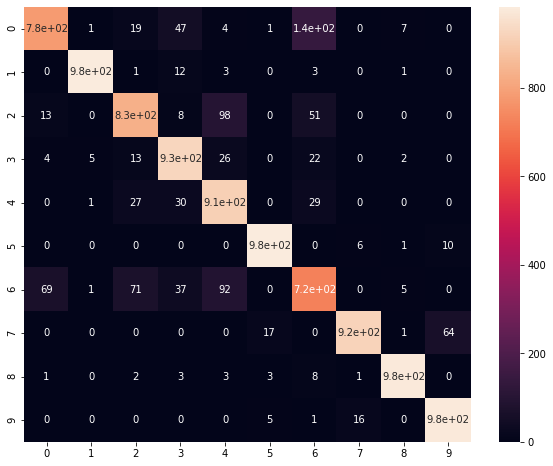

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True);

In [125]:
ft_predict = x_test[0]

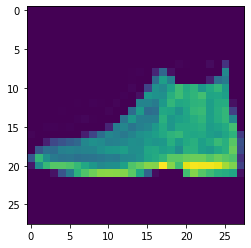

In [129]:
plt.imshow(ft_predict.reshape(28,28));

In [132]:
model.predict_classes(ft_predict.reshape(1,28,28,1)) # total_batch_size, width, height, color

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])